# Distribuição de frequência

In [17]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as srn
srn.set()

In [2]:
dataset = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                    164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                    155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])
len(dataset)

40

In [3]:
# ordenação
dados = np.sort(dataset)
len(dados)

40

In [4]:
# minimo e maximo
minimo = dados.min()
maximo = dados.max()
minimo, maximo

(150, 173)

In [8]:
pd.DataFrame(np.unique(dados, return_counts=True))

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,150,151,152,153,154,155,156,157,158,160,...,163,164,165,166,167,168,169,170,172,173
1,1,1,2,1,1,4,3,1,2,5,...,2,3,1,1,1,2,1,1,1,1


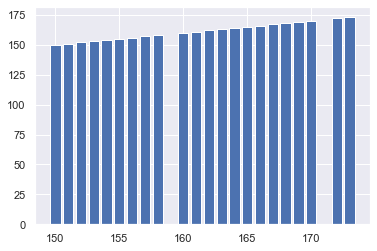

In [11]:
plt.bar(dados, dados);

In [14]:
# numero de classes
n = len(dados)
i = round(1 + 3.3*np.log10(n))
i

6

In [15]:
# AA = maximo - minimo
aa = maximo-minimo
aa

23

In [18]:
# h = AA/i
h = math.ceil(aa/i)  # arredonda pra cima
h

4

In [23]:
intervalos = np.arange(minimo, maximo+2, step=h)
intervalos

array([150, 154, 158, 162, 166, 170, 174])

In [37]:
intervalo1, intervalo2, intervalo3, intervalo4, intervalo5, intervalo6 = 0,0,0,0,0,0
for i in range(n):
    if dados[i] >= intervalos[0] and dados[i] < intervalos[1]:
        intervalo1 += 1
    elif dados[i] >= intervalos[1] and dados[i] < intervalos[2]:
        intervalo2 +=1
    elif dados[i] >= intervalos[2] and dados[i] < intervalos[3]:
        intervalo3 +=1
    elif dados[i] >= intervalos[3] and dados[i] < intervalos[4]:
        intervalo4 +=1
    elif dados[i] >= intervalos[4] and dados[i] < intervalos[5]:
        intervalo5 +=1
    elif dados[i] >= intervalos[5] and dados[i] < intervalos[6]:
        intervalo6 +=1

lista_intervalos = [intervalo1, intervalo2, intervalo3, intervalo4, intervalo5, intervalo6]
lista_intervalos

[5, 9, 11, 7, 5, 3]

In [40]:
lista_classes = []
for i in range(len(lista_intervalos)):
    lista_classes.append(str(intervalos[i]) + '-' + str(intervalos[i+1]))
lista_classes

['150-154', '154-158', '158-162', '162-166', '166-170', '170-174']

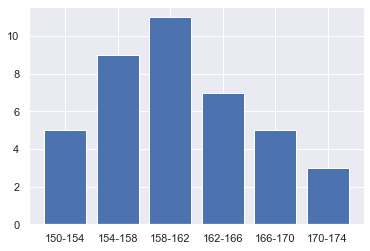

In [41]:
plt.bar(lista_classes, lista_intervalos);

## Histograma

In [42]:
dataset  # não estão ordenados

array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
       164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164, 155,
       152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172,
       153])

In [53]:
frequencia, classes = np.histogram(dados)
print(f'Frequencia: {frequencia} \nClasses:{classes}\n') 
print(f'Número de classes: {len(classes)}')  # 11 faixas de classes

Frequencia: [4 2 7 3 9 3 5 3 2 2] 
Classes:[150.  152.3 154.6 156.9 159.2 161.5 163.8 166.1 168.4 170.7 173. ]

Número de classes: 11


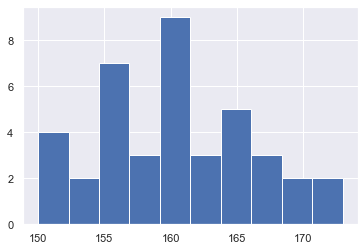

In [50]:
plt.hist(dados, bins=classes);

In [54]:
freq, clas = np.histogram(dados, bins=5)
print(f'Frequencia: {freq} \nClasses:{clas}\n') 
print(f'Número de classes: {len(clas)}')  # 6 faixas de classes

Frequencia: [ 6 10 12  8  4] 
Classes:[150.  154.6 159.2 163.8 168.4 173. ]

Número de classes: 6


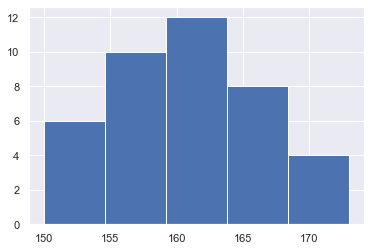

In [55]:
plt.hist(dados, bins=clas);

In [56]:
freq2, clas2 = np.histogram(dados, bins='sturges')
print(f'Frequencia: {freq2} \nClasses:{clas2}\n') 
print(f'Número de classes: {len(clas2)}')  # 8 faixas de classes

Frequencia: [ 5  8  3 12  5  4  3] 
Classes:[150.         153.28571429 156.57142857 159.85714286 163.14285714
 166.42857143 169.71428571 173.        ]

Número de classes: 8


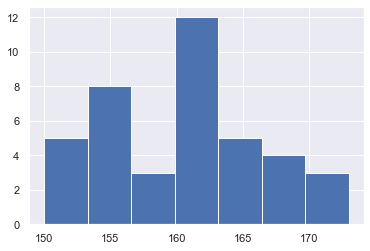

In [57]:
plt.hist(dados, bins=clas2);

## Histograma com dataframes

In [60]:
df = pd.DataFrame({'dados': dataset})
df.head()

,dados
0,160
1,165
2,167
3,164
4,160


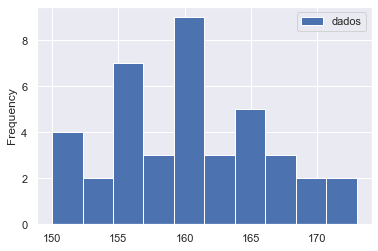

In [61]:
df.plot.hist();  # default é 10 bins

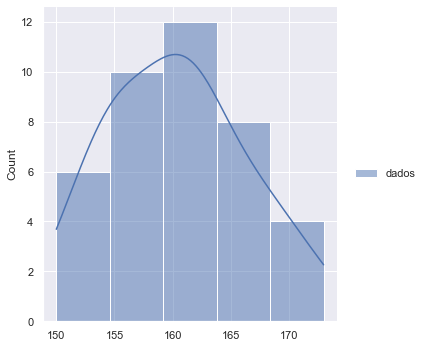

In [71]:
srn.displot(df, kde=True, bins=5);

## EXERCICIO

In [72]:
df_ex = pd.read_csv('Bases de dados/census.csv')
print(df_ex.shape)
df_ex.head()

(32561, 15)


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


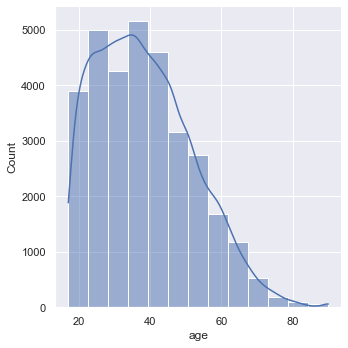

In [76]:
srn.displot(df_ex['age'], bins=13, kde=True)